## 目標網頁：https://www.mih-ev.org/tw/members-directory/

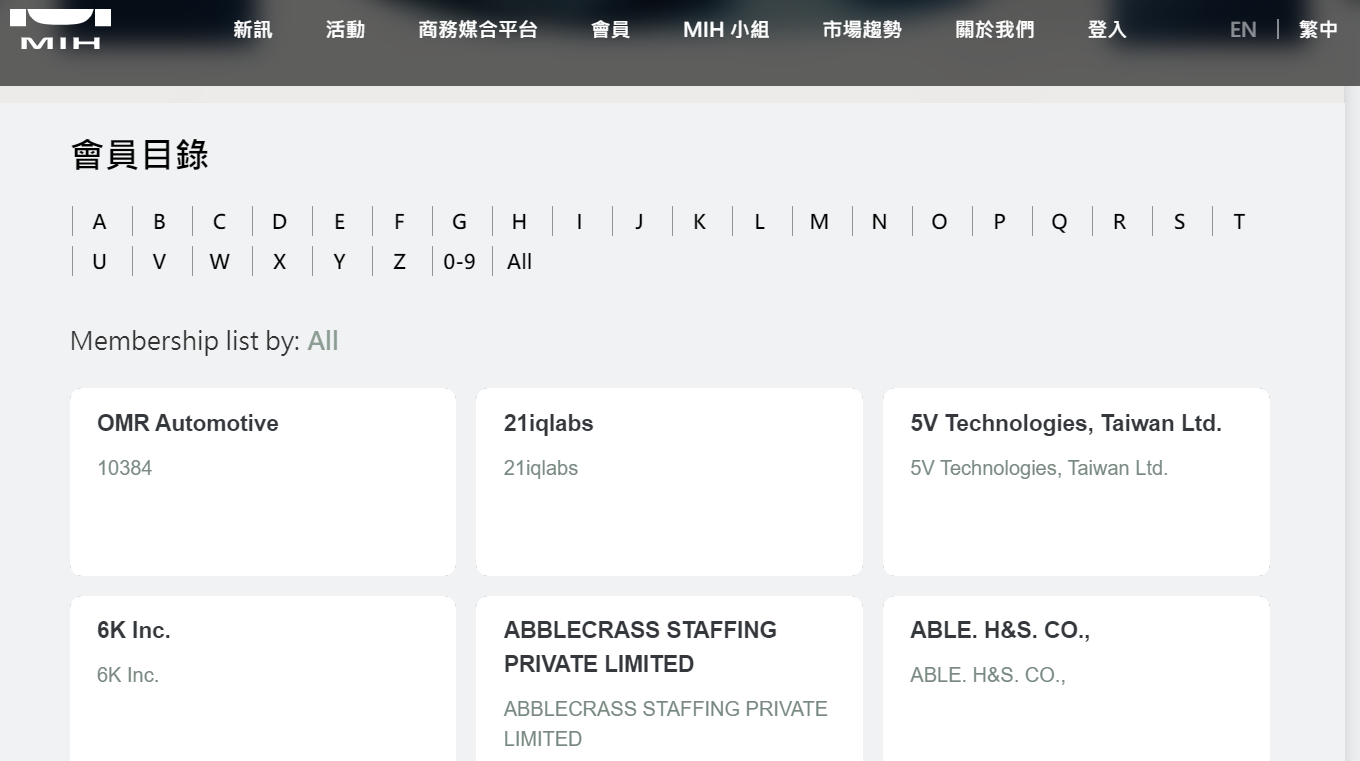

## 輸出結果：
只要一個很簡單的成員名單表格，如下

* MIH成員名單
    * 企業名稱
    * 企業名稱譯名
    * 企業官網連結

## 程式語法：

In [5]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time 

HEADER = {'User-Agent': 'Mozilla/5.0'}

In [14]:
eng_name = []
twn_name = []
links = []

# 設定以頁為單位爬取資料
def catch_names_in_page(page):
    global eng_name, twn_name
    
    response = requests.get(f'https://www.mih-ev.org/tw/members-directory/?category=&current_page={page}', headers= HEADER)
    time.sleep(3)
    
    soup = BeautifulSoup(response.text, 'html.parser')
#     print(soup)
    descriptions = soup.select('.mih-item-card-content')
    
#     print(descriptions)
    for a in soup.select('.detail-article .other-item'):
        links.append(a['company_link'])
    
    for des in descriptions:
        if len(str(des).splitlines()) == 4:
            eng_name.append(str(des).splitlines()[1].split('>')[1].split('<')[0])
            twn_name.append(str(des).splitlines()[2].split('>')[1].split('<')[0])
            
        elif len(str(des).splitlines()) == 3:
            eng_name.append(str(des).splitlines()[1].split('>')[1].split('<')[0])
            twn_name.append('')
            pass

In [1]:
for i in range(1, 85):
    catch_names_in_page(i)
    
print(len(eng_name))
print(len(twn_name))
print(len(links))

In [19]:
df = pd.DataFrame({'company_name':eng_name,'name_in_translate':twn_name, 'website':links})
df.to_csv('members_of_MIH.csv', encoding='utf_8_sig',index=False)